In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
data = pd.read_csv('E:/data science/Assignments_Data_science/Simple linear regression/Salary_Data.csv')

In [13]:
data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [7]:
type(data)
data.shape

(30, 2)

In [8]:
data.dtypes

YearsExperience    float64
Salary             float64
dtype: object

# Data type conversion 

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


# Duplicates

In [12]:
data[data.duplicated()].shape

(0, 2)

# Outlier Detection 

{'whiskers': [<matplotlib.lines.Line2D at 0x1fab78b3160>,
 'caps': [<matplotlib.lines.Line2D at 0x1fab78b3820>,
 'boxes': [<matplotlib.lines.Line2D at 0x1fab78a5dc0>],
 'medians': [<matplotlib.lines.Line2D at 0x1fab78b3ee0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1fab78bf280>],
 'means': []}

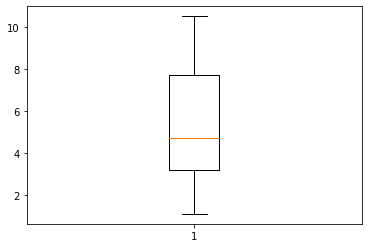

In [20]:
plt.boxplot(data['YearsExperience'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1fab79104c0>,
 'caps': [<matplotlib.lines.Line2D at 0x1fab7910b80>,
 'boxes': [<matplotlib.lines.Line2D at 0x1fab7910160>],
 'medians': [<matplotlib.lines.Line2D at 0x1fab791c280>],
 'fliers': [<matplotlib.lines.Line2D at 0x1fab791c5e0>],
 'means': []}

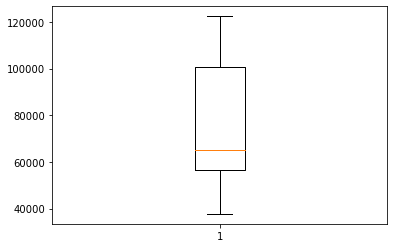

In [21]:
plt.boxplot(data['Salary'])

#Box plot shows that there are no outliers 

# Correlation 

In [55]:
#To find correlation 
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


Above correlation shows strong positive corelation between YearsExperience and salary

C:\Users\Akshay Sonawane\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

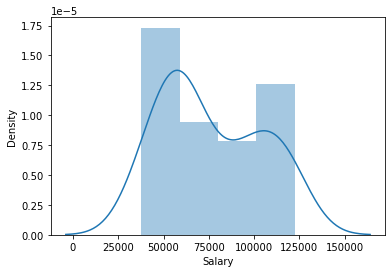

In [25]:
sns.distplot(data.Salary)

C:\Users\Akshay Sonawane\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

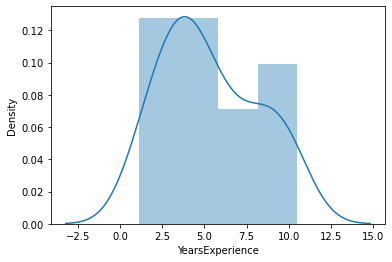

In [26]:
sns.distplot(data.YearsExperience)

# Model Building 

In [38]:
# fitting simple linear regression model 
import statsmodels.formula.api as smf
model = smf.ols("Salary~YearsExperience", data=data).fit()

<AxesSubplot:xlabel='Salary', ylabel='YearsExperience'>

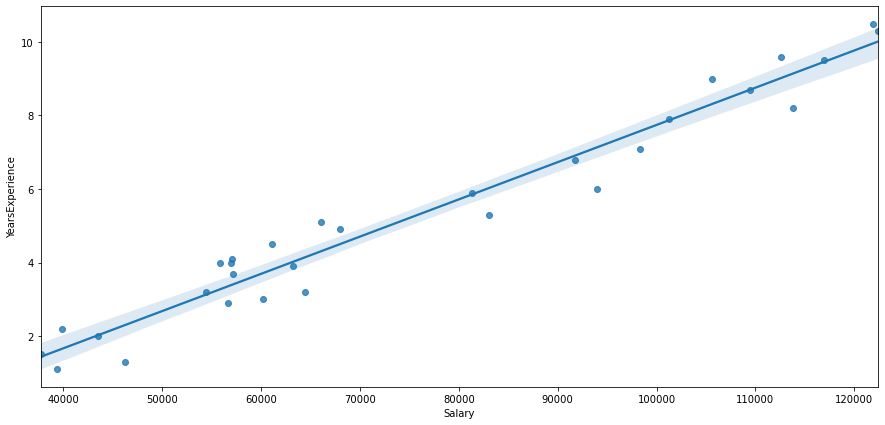

In [33]:
fig = plt.figure(figsize=(15,7))
sns.regplot(x='Salary', y='YearsExperience', data=data)

# Model Testing

In [39]:
#parameters in the model created i.e. intercept and slope
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [58]:
# finding p values and t values
print(model.tvalues, '/n' , model.pvalues)

Intercept          11.346940
YearsExperience    24.950094
dtype: float64 /n Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64


In [60]:
#r squared value
model.rsquared

0.9569566641435086

# Model predictions

In [74]:
# Manual predictions for 3.8 and 4.2 years of experience
salary1 = 25792.200199 + 9449.962321*3.8
salary2 = 25792.200199 + 9449.962321*4.2
print(salary1)
print(salary2)

61702.0570188
65482.04194720001


In [68]:
#Automatic prediction using the model 
data_test= pd.Series([3.8, 4.2])

In [75]:
data_pred = pd.DataFrame(data_test, columns=['YearsExperience'])
data_pred

,YearsExperience
0,3.8
1,4.2


In [79]:
model.predict(data_pred)

0    61702.057020
1    65482.041949
dtype: float64